A data study on NYPD Motor vehicle Collisions

Dataset: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold


%matplotlib inline

In [2]:
df = pd.read_csv("NYPD_Motor_Vehicle_Collisions_-_Crashes.csv")

In [3]:
df

DATE   TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0       01/01/2019   0:00        NaN       NaN  40.882710 -73.881256   
1       01/01/2019   4:19  MANHATTAN   10038.0        NaN        NaN   
2       01/01/2019  13:00     QUEENS   11101.0  40.753567 -73.939030   
3       01/01/2019   1:17        NaN       NaN  40.737360 -73.934074   
4       01/01/2019  17:20   BROOKLYN   11214.0  40.591877 -73.989930   
5       01/01/2019   6:55        NaN       NaN  40.740940 -73.917250   
6       01/01/2019   3:13      BRONX   10467.0  40.876022 -73.862144   
7       01/01/2019  16:20     QUEENS   11434.0        NaN        NaN   
8       01/01/2019  22:00   BROOKLYN   11203.0  40.645970 -73.929760   
9       01/01/2019   4:45      BRONX   10468.0  40.867878 -73.893005   
10      01/01/2019   8:25        NaN       NaN  40.764744 -73.861790   
11      01/01/2019  16:20     QUEENS   11358.0  40.768032 -73.803894   
12      01/01/2019   6:57        NaN       NaN  40.674934 -73.801860   
13      01/01/2019   0:15      BRONX   10469.0  40.872100 -73.849884   
14      01/01/2019  23:52     QUEENS   11374.0  40.730434 -73.860610   
15      01/01/2019  12:00      BRONX   10465.0  40.836643 -73.821290   
16      01/01/2019  18:30        NaN       NaN        NaN        NaN   
17      01/01/2019   0:27      BRONX   10455.0  40.813270 -73.905136   
18      01/01/2019  13:50   BROOKLYN   11205.0  40.698463 -73.960205   
19      01/01/2019  22:10      BRONX   10459.0  40.820305 -73.890830   
20      01/01/2019  19:20        NaN       NaN        NaN        NaN   
21      01/01/2019   1:56  MANHATTAN   10019.0  40.762100 -73.978810   
22      01/01/2019  20:30        NaN       NaN  40.741800 -73.728150   
23      01/01/2019   5:40      BRONX   10475.0  40.884480 -73.832726   
24      01/01/2019   6:02   BROOKLYN   11208.0  40.682390 -73.876625   
25      01/01/2019  18:00        NaN       NaN  40.819380 -73.959340   
26      01/01/2019  15:20     QUEENS   11361.0  40.757760 -73.783400   
27      01/01/2019  19:00        NaN       NaN        NaN        NaN   
28      01/01/2019  14:36  MANHATTAN   10002.0  40.720360 -73.988205   
29      01/01/2019   5:10   BROOKLYN   11234.0  40.630466 -73.928900   
...            ...    ...        ...       ...        ...        ...   
149047  09/13/2019  10:53   BROOKLYN   11229.0  40.613270 -73.946280   
149048  09/13/2019   0:02   BROOKLYN   11207.0  40.678160 -73.897484   
149049  09/13/2019  15:20        NaN       NaN  40.813374 -73.956276   
149050  09/13/2019  16:25     QUEENS   11366.0  40.729504 -73.780130   
149051  09/13/2019  11:20     QUEENS   11434.0  40.692250 -73.766690   
149052  09/13/2019  11:10        NaN       NaN  40.694840 -73.983910   
149053  09/13/2019  15:52        NaN       NaN  40.762127 -73.997390   
149054  09/13/2019  18:45        NaN       NaN  40.682846 -73.953820   
149055  09/13/2019   8:00        NaN       NaN  40.642174 -74.020640   
149056  09/13/2019   9:10        NaN       NaN        NaN        NaN   
149057  09/13/2019  23:29        NaN       NaN  40.738194 -73.849200   
149058  09/13/2019  12:12        NaN       NaN  40.783993 -73.954420   
149059  09/13/2019  13:06  MANHATTAN   10016.0  40.747627 -73.976746   
149060  09/13/2019  18:00        NaN       NaN  40.756730 -73.721520   
149061  09/13/2019  17:10     QUEENS   11426.0  40.737373 -73.717220   
149062  09/13/2019  20:53      BRONX   10463.0  40.882633 -73.902190   
149063  09/13/2019   8:51        NaN       NaN  40.880657 -73.877625   
149064  09/13/2019  22:00  MANHATTAN   10001.0  40.749718 -73.993500   
149065  09/13/2019   8:31     QUEENS   11691.0  40.603413 -73.763230   
149066  09/13/2019  22:50        NaN       NaN  40.758305 -73.855610   
149067  09/13/2019  12:00     QUEENS   11418.0  40.695170 -73.845110   
149068  09/13/2019  20:10        NaN       NaN  40.799960 -73.946980   
149069  09/13/2019  16:54        NaN       NaN  40.606457 -73.989136   
149070  09/13/2019   9:00  MANHATTAN   10029.0  40.797

In [4]:
df.describe()

<bound method NDFrame.describe of               DATE   TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0       01/01/2019   0:00        NaN       NaN  40.882710 -73.881256   
1       01/01/2019   4:19  MANHATTAN   10038.0        NaN        NaN   
2       01/01/2019  13:00     QUEENS   11101.0  40.753567 -73.939030   
3       01/01/2019   1:17        NaN       NaN  40.737360 -73.934074   
4       01/01/2019  17:20   BROOKLYN   11214.0  40.591877 -73.989930   
5       01/01/2019   6:55        NaN       NaN  40.740940 -73.917250   
6       01/01/2019   3:13      BRONX   10467.0  40.876022 -73.862144   
7       01/01/2019  16:20     QUEENS   11434.0        NaN        NaN   
8       01/01/2019  22:00   BROOKLYN   11203.0  40.645970 -73.929760   
9       01/01/2019   4:45      BRONX   10468.0  40.867878 -73.893005   
10      01/01/2019   8:25        NaN       NaN  40.764744 -73.861790   
11      01/01/2019  16:20     QUEENS   11358.0  40.768032 -73.803894   
12      01/01/2019   6:57     

In [5]:
df.shape

(149077, 29)

### Big data to do big things

Convert the date and time datatypes to datetime

In [6]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["TIME"] = pd.to_datetime(df["TIME"])
df.dtypes

DATE                             datetime64[ns]
TIME                             datetime64[ns]
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [7]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
#To view the max columns/rows, and remove the automatic cutoff it has.
df.groupby("BOROUGH").describe()

ZIP CODE                                                       \
                 count          mean         std      min      25%      50%   
BOROUGH                                                                       
BRONX          15801.0  10462.139105    6.971925  10451.0  10456.0  10461.0   
BROOKLYN       31332.0  11219.458828   11.905324  11201.0  11208.0  11218.0   
MANHATTAN      18784.0  10024.800149   26.955483  10000.0  10011.0  10019.0   
QUEENS         27935.0  11373.674566  112.497130  11001.0  11366.0  11379.0   
STATEN ISLAND   2675.0  10306.628037    3.736802  10301.0  10304.0  10306.0   

                                LATITUDE                                       \
                   75%      max    count       mean       std  min        25%   
BOROUGH                                                                         
BRONX          10468.0  10475.0  15132.0  40.801916  1.368658  0.0  40.826015   
BROOKLYN       11230.0  11385.0  30732.0  40.600105  1.502390  0.0  40.630382   
MANHATTAN      10032.0  10282.0  18072.0  40.708785  1.484999  0.0  40.737666   
QUEENS         11421.0  11697.0  27329.0  40.642705  1.740515  0.0  40.690918   
STATEN ISLAND  10310.0  10314.0   2570.0  40.558314  1.132704  0.0  40.560305   

                                               LONGITUDE                       \
                     50%        75%        max     count       mean       std   
BOROUGH                                                                         
BRONX          40.844337  40.869073  40.912884   15132.0 -73.798455  2.475212   
BROOKLYN       40.657803  40.681867  40.738060   30732.0 -73.848324  2.732221   
MANHATTAN      40.757698  40.782247  40.872917   18072.0 -73.877463  2.694207   
QUEENS         40.720154  40.749500  40.797005   27329.0 -73.693463  3.155628   
STATEN ISLAND  40.595279  40.621795  40.648273    2570.0 -74.064252  2.067825   

                                                               \
                    min        25%        50%        75%  max   
BOROUGH                                                         
BRONX         -73.96986 -73.905396 -73.886020 -73.858449  0.0   
BROOKLYN      -74.04072 -73.977620 -73.950910 -73.921828  0.0   
MANHATTAN     -74.01794 -73.993614 -73.981130 -73.957466  0.0   
QUEENS        -73.95933 -73.875750 -73.826810 -73.780240  0.0   
STATEN ISLAND -74.25184 -74.147110 -74.110447 -74.086464  0.0   

              NUMBER OF PERSONS INJURED                                     \
                                  count      mean       std  min  25%  50%   
BOROUGH                                                                      
BRONX                           15803.0  0.289818  0.699261  0.0  0.0  0.0   
BROOKLYN                        31332.0  0.291044  0.668151  0.0  0.0  0.0   
MANHATTAN                       18786.0  0.194400  0.502538  0.0  0.0  0.0   
QUEENS                          27962.0  0.273514  0.650183  0.0  0.0  0.0   
STATEN ISLAND                    2675.0  0.375701  0.823509  0.0  0.0  0.0   

                         NUMBER OF PERSONS KILLED                           \
               75%   max                    count      mean       std  min   
BOROUGH                                                                      
BRONX          0.0  12.0                  15803.0  0.000380  0.019482  0.0   
BROOKLYN       0.0  14.0                  31332.0  0.001245  0.036153  0.0   
MANHATTAN      0.0   7.0                  18786.0  0.000905  0.030069  0.0   
QUEENS         0.0  18.0                  27962.0  0.000894  0.029888  0.0   
STATEN ISLAND  1.0  17.0                   2675.0  0.001495  0.038648  0.0   

                                  NUMBER OF PEDESTRIANS INJURED            \
               25%  50%  75%  max                         count      mean   
BOROUGH                                                                     
BRONX          0.0  0.0  0.0  1.0                       15803.0  0.058660   
BROO

Let's create a dataframe that represents collision that happened in specific boroughs.

In [8]:
bronx_filter = df["BOROUGH"] == "BRONX"
bronx = df[bronx_filter]
manhattan_filter = df["BOROUGH"] == "MANHATTAN"
manhattan = df[manhattan_filter]


Bronx filter

In [9]:
bronx.head()

DATE                TIME BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
6  2019-01-01 2019-10-10 03:13:00   BRONX   10467.0  40.876022 -73.862144   
9  2019-01-01 2019-10-10 04:45:00   BRONX   10468.0  40.867878 -73.893005   
13 2019-01-01 2019-10-10 00:15:00   BRONX   10469.0  40.872100 -73.849884   
15 2019-01-01 2019-10-10 12:00:00   BRONX   10465.0  40.836643 -73.821290   
17 2019-01-01 2019-10-10 00:27:00   BRONX   10455.0  40.813270 -73.905136   

                   LOCATION                    ON STREET NAME  \
6   (40.876022, -73.862144)  EAST GUN HILL ROAD                 
9   (40.867878, -73.893005)  GRAND CONCOURSE                    
13    (40.8721, -73.849884)  EAST GUN HILL ROAD                 
15   (40.836643, -73.82129)                               NaN   
17   (40.81327, -73.905136)  UNION AVENUE                       

   CROSS STREET NAME                           OFF STREET NAME  \
6      BARNES AVENUE                                       NaN   
9    EAST 196 STREET                                       NaN   
13      BOUCK AVENUE                                       NaN   
15               NaN  1155      VINCENT AVENUE                   
17   EAST 150 STREET                                       NaN   

    NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
6                           0                         0   
9                           0                         0   
13                          0                         0   
15                          1                         0   
17                          0                         0   

    NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
6                               0                             0   
9                               0                             0   
13                              0                             0   
15                              1                             0   
17                              0                             0   

    NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
6                           0                         0   
9                           0                         0   
13                          0                         0   
15                          0                         0   
17                          0                         0   

    NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
6                            0                          0   
9                            0                          0   
13                           0                          0   
15                           0                          0   
17                           0                          0   

     CONTRIBUTING FACTOR VEHICLE 1   CONTRIBUTING FACTOR VEHICLE 2  \
6   Driver Inattention/Distraction                     Unspecified   
9   Driver Inattention/Distraction  Driver Inattention/Distraction   
13    Aggressive Driving/Road Rage                     Unspecified   
15                     Unspecified                             NaN   
17                     Unspecified                     Unspecified   

   CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
6                            NaN                           NaN   
9                            NaN                           NaN   
13                   Unspecified                   Unspecified   
15                           NaN                           NaN   
17                           NaN                           NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
6                            NaN       4060461   
9                            NaN       4060864   
13                           NaN       4061761   
15                           NaN       4060504   
17                           NaN       4060432   

                    VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
6   Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   

Mnahattan filter

In [10]:
manhattan.head()

DATE                TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
1  2019-01-01 2019-10-10 04:19:00  MANHATTAN   10038.0        NaN        NaN   
21 2019-01-01 2019-10-10 01:56:00  MANHATTAN   10019.0  40.762100 -73.978810   
28 2019-01-01 2019-10-10 14:36:00  MANHATTAN   10002.0  40.720360 -73.988205   
33 2019-01-01 2019-10-10 01:30:00  MANHATTAN   10023.0  40.770573 -73.982155   
35 2019-01-01 2019-10-10 01:00:00  MANHATTAN   10031.0  40.825954 -73.943370   

                   LOCATION                    ON STREET NAME  \
1                       NaN  FINEST AVENUE                      
21     (40.7621, -73.97881)                               NaN   
28   (40.72036, -73.988205)                               NaN   
33  (40.770573, -73.982155)  WEST 62 STREET                     
35   (40.825954, -73.94337)  WEST 148 STREET                    

        CROSS STREET NAME                           OFF STREET NAME  \
1            PEARL STREET                                       NaN   
21                    NaN  1330      AVENUE OF THE AMERICAS           
28                    NaN  136       LUDLOW STREET                    
33               BROADWAY                                       NaN   
35  SAINT NICHOLAS AVENUE                                       NaN   

    NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
1                           0                         0   
21                          0                         0   
28                          0                         0   
33                          0                         0   
35                          1                         0   

    NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
1                               0                             0   
21                              0                             0   
28                              0                             0   
33                              0                             0   
35                              1                             0   

    NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
1                           0                         0   
21                          0                         0   
28                          0                         0   
33                          0                         0   
35                          0                         0   

    NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
1                            0                          0   
21                           0                          0   
28                           0                          0   
33                           0                          0   
35                           0                          0   

     CONTRIBUTING FACTOR VEHICLE 1   CONTRIBUTING FACTOR VEHICLE 2  \
1   Driver Inattention/Distraction                             NaN   
21  Driver Inattention/Distraction  Driver Inattention/Distraction   
28                     Unspecified                             NaN   
33                 Other Vehicular  Driver Inattention/Distraction   
35                             NaN                             NaN   

   CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
1                            NaN                           NaN   
21                           NaN                           NaN   
28                           NaN                           NaN   
33                           NaN                           NaN   
35                           NaN                           NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID VEHICLE TYPE CODE 1  \
1                            NaN       4064868               Sedan   
21                           NaN       4060688                Taxi   
28                           NaN       4060593               Sedan   
33                           NaN       4060445                Taxi   
35                           NaN       4060428                

In [11]:
#Create filter for January only
jan_filter = (df["DATE"].dt.month == 1)

In [12]:
bronx_jan_filter = (bronx["DATE"].dt.month == 1)
bronx[bronx_jan_filter]

DATE                TIME BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
6     2019-01-01 2019-10-10 03:13:00   BRONX   10467.0  40.876022 -73.862144   
9     2019-01-01 2019-10-10 04:45:00   BRONX   10468.0  40.867878 -73.893005   
13    2019-01-01 2019-10-10 00:15:00   BRONX   10469.0  40.872100 -73.849884   
15    2019-01-01 2019-10-10 12:00:00   BRONX   10465.0  40.836643 -73.821290   
17    2019-01-01 2019-10-10 00:27:00   BRONX   10455.0  40.813270 -73.905136   
19    2019-01-01 2019-10-10 22:10:00   BRONX   10459.0  40.820305 -73.890830   
23    2019-01-01 2019-10-10 05:40:00   BRONX   10475.0  40.884480 -73.832726   
30    2019-01-01 2019-10-10 10:10:00   BRONX   10458.0  40.867090 -73.885750   
34    2019-01-01 2019-10-10 03:30:00   BRONX   10465.0  40.829407 -73.819670   
49    2019-01-01 2019-10-10 12:58:00   BRONX   10455.0  40.814934 -73.914960   
58    2019-01-01 2019-10-10 21:22:00   BRONX   10467.0  40.884014 -73.879100   
76    2019-01-01 2019-10-10 17:30:00   BRONX   10459.0  40.821415 -73.889330   
90    2019-01-01 2019-10-10 05:20:00   BRONX   10473.0  40.818350 -73.843130   
109   2019-01-01 2019-10-10 08:28:00   BRONX   10455.0  40.812300 -73.914110   
110   2019-01-01 2019-10-10 07:00:00   BRONX   10463.0  40.870730 -73.903984   
123   2019-01-01 2019-10-10 09:00:00   BRONX   10475.0  40.877125 -73.829636   
130   2019-01-01 2019-10-10 00:25:00   BRONX   10457.0  40.852947 -73.903200   
131   2019-01-01 2019-10-10 04:15:00   BRONX   10472.0  40.833607 -73.878430   
135   2019-01-01 2019-10-10 12:00:00   BRONX   10463.0  40.870780 -73.906860   
143   2019-01-01 2019-10-10 17:45:00   BRONX   10464.0  40.838990 -73.783430   
146   2019-01-01 2019-10-10 14:30:00   BRONX   10466.0  40.894660 -73.861370   
163   2019-01-01 2019-10-10 11:30:00   BRONX   10475.0  40.879353 -73.834560   
165   2019-01-01 2019-10-10 15:57:00   BRONX   10453.0  40.851936 -73.905570   
169   2019-01-01 2019-10-10 00:04:00   BRONX   10453.0  40.857708 -73.904300   
177   2019-01-01 2019-10-10 15:00:00   BRONX   10466.0  40.892624 -73.859924   
210   2019-01-01 2019-10-10 19:49:00   BRONX   10460.0  40.848682 -73.883790   
212   2019-01-01 2019-10-10 04:40:00   BRONX   10452.0  40.838360 -73.924930   
217   2019-01-01 2019-10-10 13:35:00   BRONX   10467.0  40.865627 -73.862270   
225   2019-01-01 2019-10-10 01:25:00   BRONX   10453.0  40.861862 -73.912820   
230   2019-01-01 2019-10-10 18:50:00   BRONX   10464.0  40.853546 -73.790150   
239   2019-01-01 2019-10-10 20:29:00   BRONX   10465.0  40.819542 -73.817520   
247   2019-01-01 2019-10-10 03:22:00   BRONX   10455.0  40.812620 -73.906070   
248   2019-01-01 2019-10-10 16:30:00   BRONX   10468.0        NaN        NaN   
254   2019-01-01 2019-10-10 15:03:00   BRONX   10475.0  40.882260 -73.827820   
306   2019-01-01 2019-10-10 04:55:00   BRONX   10467.0  40.882590 -73.869804   
307   2019-01-01 2019-10-10 19:45:00   BRONX   10461.0  40.838596 -73.846855   
311   2019-01-01 2019-10-10 01:15:00   BRONX   10463.0  40.884033 -73.897970   
328   2019-01-01 2019-10-10 15:17:00   BRONX   10455.0  40.812695 -73.915260   
343   2019-01-01 2019-10-10 08:00:00   BRONX   10473.0  40.813170 -73.859146   
358   2019-01-01 2019-10-10 20:00:00   BRONX   10458.0  40.864132 -73.891320   
370   2019-01-01 2019-10-10 10:30:00   BRONX   10460.0  40.835396 -73.886800   
376   2019-01-01 2019-10-10 03:50:00   BRONX   10452.0  40.832314 -73.931610   
378   2019-01-01 2019-10-10 02:48:00   BRONX   10456.0  40.830143 -73.919050   
383   2019-01-01 2019-10-10 20:17:00   BRONX   10466.0  40.890545 -73.840870   
398   2019-01-01 2019-10-10 16:00:00   BRONX   10460.0  40.835808 -73.890830   
400   2019-01-01 2019-10-10 01:55:00   BRONX   10452.0  40.841724 -73.919136   
403   2019-01-01 2019-10-10 05:05:00   BRONX   10458.0  40.864132 -73.891320   
425   2019-01-01 2019-10-10 06:25:00   BRONX   10458.0  40.861942 -73.893730   
428   2019-01-02 2019-10-10 10:00:00   BRONX   10475.0        NaN        NaN   
441   2019-0

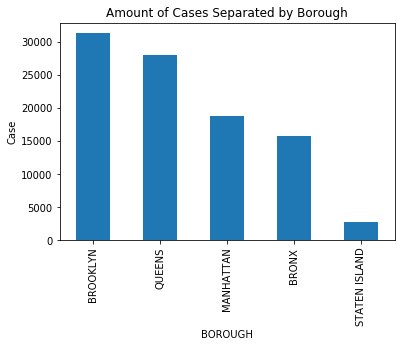

In [49]:
df_counts = df["BOROUGH"].value_counts()
df_counts.plot.bar()
plt.xlabel("BOROUGH")
plt.ylabel("Case")
plt.title("Amount of Cases Separated by Borough")

#plt.savefig('fig1.png')

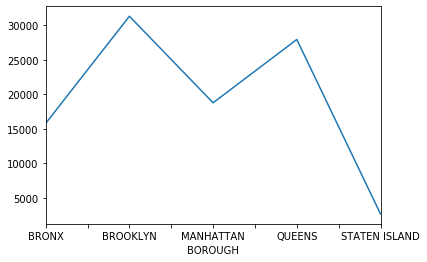

In [50]:
df_groupby_boro = df.groupby("BOROUGH").count()["NUMBER OF PERSONS INJURED"]
#Group the data by boroughs compared with number of persons injured

df_groupby_boro.plot()
#Representing the data above with a standard plot

plt.savefig('fig1-2.png')

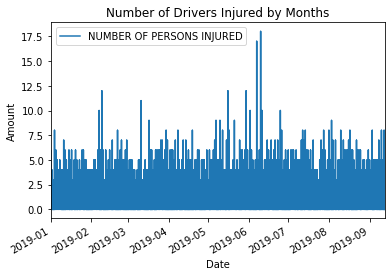

In [51]:
df.plot(x = "DATE", y = "NUMBER OF PERSONS INJURED")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Number of Drivers Injured by Months")

plt.savefig('fig2.png')

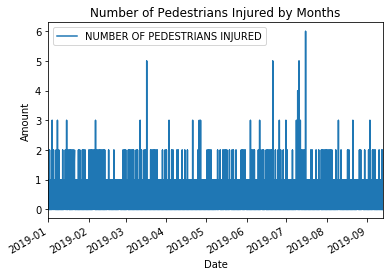

In [58]:
df.plot(x = "DATE", y = "NUMBER OF PEDESTRIANS INJURED")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Number of Pedestrians Injured by Months")

plt.savefig('fig3.png')

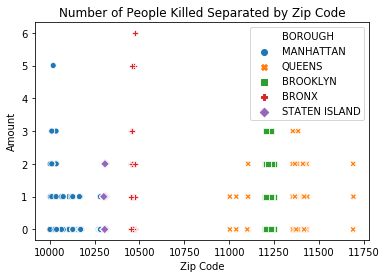

In [54]:
sns.scatterplot(x = "ZIP CODE", y = "NUMBER OF PEDESTRIANS INJURED", hue = "BOROUGH", style = "BOROUGH", data = df)
plt.xlabel("Zip Code")
plt.ylabel("Amount")
plt.title("Number of People Killed Separated by Zip Code")

plt.savefig('fig4.png')

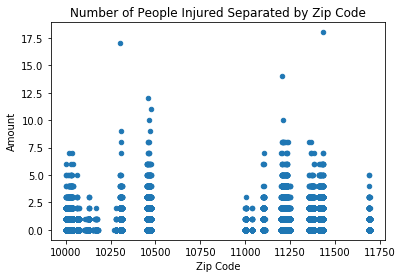

In [55]:
df.plot.scatter(x = "ZIP CODE", y = "NUMBER OF PERSONS INJURED")
plt.xlabel("Zip Code")
plt.ylabel("Amount")
plt.title("Number of People Injured Separated by Zip Code")
#This is the same graph like above but with a different 

plt.savefig('fig4-2.png')

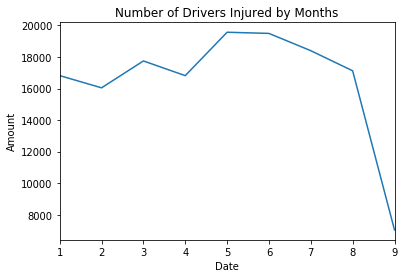

In [56]:
df_groupby_date = df.groupby(df["DATE"].dt.month).count()["NUMBER OF PERSONS INJURED"]
#Group the data by months

df_groupby_date.plot()
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Number of Drivers Injured by Months")

plt.savefig('fig5.png')